In [69]:
import random
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy
from fitter import Fitter, get_common_distributions, get_distributions

In [70]:
db= pd.read_csv(r'../dane/moves.csv')
db

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

prawdopodobienstwo popełenienia błedu w zależności od czasu dla 300+0

In [ ]:
def histogram(x: list, xlabel='',ylabel='',title='',ylim=None, **kwargs):
    # the histogram of the data
    n, bins, patches = plt.hist(x, density = True,**kwargs)
    plt.xlabel(xlabel)
    plt.ylabel=(ylabel)
    plt.title(title)
#     plt.text(50, .035, r'$\mu = 50,\
# \ \sigma = 13$')
    if ylim:
        plt.ylim(ylim[0],ylim[1])

    plt.grid(True)
    plt.show()

In [ ]:
blunder_60 = db[(db['score'] == 'blunder' )&( db['TimeControl'] == '300+0') & (db['delta_time']<= 60)& (db['move'] > 4) & (db['delta_time']>= 0) ]
histogram(blunder_60['delta_time'],bins=60,ylim=(0,0.2))
len(blunder_60)

In [ ]:
blunder_60 = db[(db['TimeControl'] == '300+0') & (db['delta_time']<= 60) & (db['move'] > 4) & (db['delta_time']>= 0) ]
histogram(blunder_60['delta_time'],bins=60,ylim=(0,0.2))
len(blunder_60)

In [ ]:
# blunder_60 = db[(db['score'] == 'mistake' )&( db['TimeControl'] == '300+0') & (db['delta_time']<= 60)& (db['move'] > 4) & (db['delta_time']>= 0) ]
# # c = blunder_60['delta_time'].hist(bins = 60, density = True)
# histogram(blunder_60['delta_time'],bins=60,ylim=(0,0.2))
# len(blunder_60)

In [ ]:
# blunder_60 = db[(db['score'] == 'dubious move' )&( db['TimeControl'] == '300+0') & (db['delta_time']<= 60)& (db['move'] > 4) & (db['delta_time']>= 0) ]
# histogram(blunder_60['delta_time'],bins=60,ylim=(0,0.2))
# len(blunder_60)

prawdopodobienstwo popełenienia błedu w zależności od ruchu dla 300+0

In [ ]:

m = db[db['TimeControl']=='300+0'][['score','move','Result']].groupby(['move','score']).count().reset_index()
m

In [ ]:
m2 = pd.merge(m,m.groupby('move').sum().reset_index(),how='left', on='move')
m2['prob'] = m2['Result_x']/m2['Result_y']

In [ ]:
m2[m2['score']=='blunder'][['score','move','prob']]

In [ ]:
m2[m2['score']=='blunder'][['move','prob','Result_y']].plot(x='move',y='prob')

In [ ]:
m2[m2['score']=='blunder'][['move','prob','Result_y']].plot(x='move',y='Result_y')


prawdopodobienstwo popełenienia błedu w zależności od czasu dla 300+0

In [ ]:
m = db[(db['TimeControl']=='300+0') & (db['delta_time']>=0)& (db['delta_time']<=60)][['score','delta_time','Result']].groupby(['delta_time','score']).count().reset_index()
m

In [ ]:
m2 = pd.merge(m,m.groupby('delta_time').sum().reset_index(),how='left', on='delta_time')
m2['prob'] = m2['Result_x']/m2['Result_y']

In [ ]:
m2[m2['score']=='blunder'][['score','delta_time','prob']]

In [ ]:
m2[m2['score']=='blunder'][['delta_time','prob','Result_y']].plot(x='delta_time',y='prob')

In [ ]:
m2[m2['score']=='blunder'][['delta_time','prob','Result_y']].plot(x='delta_time',y='Result_y')


In [ ]:
db.groupby('TimeControl').size().reset_index().sort_values(by=0,ascending=False).head(10)

In [ ]:
# fitting dist to data try
# blunder_60['delta_time'].var()

# ex = blunder_60['delta_time'].mean()
# var = blunder_60['delta_time'].var()
#
#
# x = np.linspace(min(blunder_60['delta_time']),max(blunder_60['delta_time']),61)
# x1 = np.linspace(min(blunder_60['delta_time']),max(blunder_60['delta_time']),1000)
#
# k = ex**2/np.sqrt(var)
# th = np.sqrt(var)/ex
# plt.plot(x1,stats.gamma.pdf(x1,k,th))
#
# plt.plot(x,stats.poisson.pmf(x,np.sqrt(var)))
#
# mu = np.log(ex**2/np.sqrt(var+ex**2))
# sigma = np.log(var/ex**2 +1)
# plt.plot(x1,stats.lognorm.pdf(x1,mu,sigma))
#
# histogram(blunder_60['delta_time'],bins=60,ylim=(0,0.2))

(0.8910838350483222, -0.5331385644004967, 4.564181283313526)


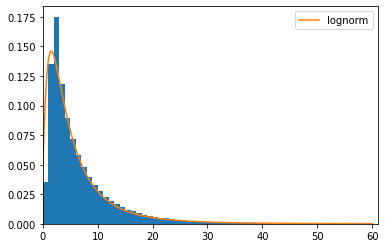

In [75]:
size = len(blunder_60['delta_time'])
x = np.linspace(min(blunder_60['delta_time']),max(blunder_60['delta_time']),1000)
y = blunder_60['delta_time']

h = plt.hist(y, bins=range(61),density=True)
dist_names = ['lognorm']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    params = dist.fit(y)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    print(params)
    if arg:
        pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale)
    else:
        pdf_fitted = dist.pdf(x, loc=loc, scale=scale)

    plt.plot(x,pdf_fitted, label=dist_name)
    plt.xlim(0,61)

plt.legend(loc='upper right')
plt.show()
